**Импорт всех необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

<b><p>data.csv</p></b>
<ul>
<li>id: id транзакции </li>
<li>timestamp: дата продажи (транзакции) </li>
<li>full_sq: общая площадь  </li>
<li>life_sq: жилая площадь  </li>
<li>floor: этаж  </li>
<li>max_floor: количество этажей в здании </li>
<li>material: материал, из которого изговолены стены  </li>
<li>build_year: год строительства </li>
<li>num_room: количество жилых комнат </li>
<li>kitch_sq: площадь кухни </li>
<li>full_all: количество населения в регионе </li>
<li> state: жилищные условия </li>
<li>sub_area: название территории </li>
<li>price_doc: цена квартиры (целевая переменная) </li>
</ul>

<b><p>macro.csv</p></b>
<ul>
<li>timestamp : дата, на которую актуальны макроэкономические показатели </li>
<li>salary : средняя зарплата в регионе </li>
<li>fixed_basket: стоимость потребительской корзины </li>
<li>rent_price_3room_eco: стоимость аренды 3-х комнатного жилья эконом-класса </li>
<li>rent_price_2room_eco: стоимость аренды 2-х комнатного жилья эконом-класса </li>
<li>rent_price_1room_eco: стоимость аренды 1-но комнатного жилья эконом-класса </li>
<li>average_life_exp: средняя продолжительность жизни в регионе </li>
</ul>

## 1.2 Загрузка данных общее описание набора данных

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data.csv")
macro = pd.read_csv("https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/data_macro.csv")

df_backup = df.copy()
macro_backup = macro.copy()

### 1.2.1 Базовый датасет

Вывести пример данных (первые строки и случайные строки)

In [3]:
df.head(10)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907.0,1.0,12.0,75377,Hamovniki,2750000
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980.0,2.0,8.0,68630,Lianozovo,9000000
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014.0,3.0,12.0,9553,Poselenie Voskresenskoe,7011550
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970.0,2.0,6.0,78616,Severnoe Butovo,7100000
4,8178,2013-05-28,38,20.0,15.0,NaN,16.0,1.0,1982.0,1.0,8.0,112804,Filevskij Park,6450000
5,8189,2013-05-28,63,NaN,17.0,1.0,17.0,4.0,2013.0,2.0,1.0,247469,Nekrasovka,5903808
6,8258,2013-05-30,74,46.0,12.0,3.0,24.0,1.0,2004.0,3.0,9.0,27992,Juzhnoe Medvedkovo,12100000
7,8271,2013-05-31,93,93.0,3.0,1.0,1.0,1.0,2013.0,3.0,1.0,5740,Poselenie Pervomajskoe,5427640
8,8285,2013-06-01,51,30.0,7.0,3.0,17.0,1.0,2003.0,2.0,9.0,125111,Solncevo,7700000
9,8290,2013-06-03,77,50.0,3.0,2.0,5.0,2.0,1957.0,3.0,8.0,1100773,Ajeroport,11700000


In [4]:
df.sample(10)

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
10969,22984,2014-09-27,53,32.0,14.0,2.0,16.0,1.0,1976.0,2.0,9.0,48439,Zjablikovo,8200000
16368,29840,2015-05-21,84,50.0,9.0,1.0,13.0,4.0,2014.0,3.0,10.0,221709,Krjukovo,8744700
4998,15689,2014-03-04,74,46.0,8.0,3.0,17.0,1.0,1986.0,3.0,10.0,113897,Troparevo-Nikulino,13500000
3709,14137,2014-01-27,59,41.0,3.0,2.0,5.0,5.0,1966.0,3.0,6.0,145576,Caricyno,2000000
3750,14191,2014-01-28,40,23.0,8.0,NaN,14.0,1.0,1973.0,2.0,6.0,111023,Ochakovo-Matveevskoe,7100000
9608,21306,2014-08-06,76,45.0,7.0,3.0,17.0,1.0,1985.0,3.0,10.0,67710,Krylatskoe,15000000
884,10669,2013-09-23,63,30.0,10.0,1.0,17.0,6.0,2014.0,2.0,12.0,9553,Poselenie Voskresenskoe,5934880
8485,19944,2014-06-21,30,17.0,8.0,3.0,9.0,2.0,1966.0,1.0,5.0,65972,Ostankinskoe,8000000
4787,15432,2014-02-26,39,20.0,7.0,3.0,12.0,1.0,1993.0,1.0,8.0,78616,Severnoe Butovo,6480000
17658,2851,2012-07-14,35,14.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,102618,Juzhnoe Butovo,5200000


Размер набора данных

In [5]:
df.shape

(18866, 14)

In [6]:
df.size

264124

Описание типов данных по признакам

##### TODO: maybe simplify later

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
pattern = re.compile("^[0-9]{4}\.[0-9]$")
df['build_year'] = df['build_year'].apply(lambda x: x[:4] if isinstance(x, str) and pattern.match(x) else np.nan)

In [9]:
df['build_year'] = pd.to_numeric(df['build_year'], downcast='integer')

In [10]:
df['build_year'] = pd.to_datetime(df['build_year'], format='%Y', errors='coerce')

In [11]:
df.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907-01-01,1.0,12.0,75377,Hamovniki,2750000
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980-01-01,2.0,8.0,68630,Lianozovo,9000000
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014-01-01,3.0,12.0,9553,Poselenie Voskresenskoe,7011550
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970-01-01,2.0,6.0,78616,Severnoe Butovo,7100000
4,8178,2013-05-28,38,20.0,15.0,NaN,16.0,1.0,1982-01-01,1.0,8.0,112804,Filevskij Park,6450000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18866 entries, 0 to 18865
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          18866 non-null  int64         
 1   timestamp   18866 non-null  datetime64[ns]
 2   full_sq     18866 non-null  int64         
 3   life_sq     17291 non-null  float64       
 4   floor       18838 non-null  float64       
 5   state       15505 non-null  float64       
 6   max_floor   17445 non-null  float64       
 7   material    17445 non-null  float64       
 8   build_year  15961 non-null  datetime64[ns]
 9   num_room    17445 non-null  float64       
 10  kitch_sq    17445 non-null  float64       
 11  full_all    18866 non-null  int64         
 12  sub_area    18866 non-null  object        
 13  price_doc   18866 non-null  int64         
dtypes: datetime64[ns](2), float64(7), int64(4), object(1)
memory usage: 2.0+ MB


In [13]:
df.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907-01-01,1.0,12.0,75377,Hamovniki,2750000
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980-01-01,2.0,8.0,68630,Lianozovo,9000000
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014-01-01,3.0,12.0,9553,Poselenie Voskresenskoe,7011550
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970-01-01,2.0,6.0,78616,Severnoe Butovo,7100000
4,8178,2013-05-28,38,20.0,15.0,NaN,16.0,1.0,1982-01-01,1.0,8.0,112804,Filevskij Park,6450000


Базовые статистики по признакам

In [14]:
df.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,18866.0000,18866.0000,17291.0000,18838.0000,15505.0000,17445.0000,17445.0000,17445.0000,17445.0000,1.8866e+04,1.8866e+04
mean,18799.7886,53.9409,34.2592,7.2937,2.2013,12.4233,1.8901,1.9348,7.2064,1.5972e+05,7.5824e+06
std,7082.4287,44.1162,59.9446,5.1912,0.8528,6.2798,1.5061,0.8642,26.9816,3.0435e+05,4.9838e+06
min,9.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.5460e+03,1.0000e+05
25%,13513.2500,38.0000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06
50%,19043.5000,49.0000,30.0000,6.0000,2.0000,12.0000,1.0000,2.0000,7.0000,8.7713e+04,6.6855e+06
75%,24748.7500,63.0000,43.0000,10.0000,3.0000,17.0000,2.0000,3.0000,9.0000,1.2535e+05,8.9000e+06
max,30473.0000,5326.0000,7478.0000,77.0000,33.0000,57.0000,6.0000,19.0000,2014.0000,1.7167e+06,9.5122e+07


Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

- Примерно четверть объектов имеют одну жилую комнату, 9 этажей в здании, третий этаж
- Самое высокое здание имеет 77 этажей

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

- full_sq, life_sq, num_room, floor, kitch_sq, sub_area, max_floor - наиболее подходят для предсказания цены квартиры, именно данными параметрами задается "престижность" жилья
- sub_area район жилья может влиять на цену, например если район находится в центре города или близок с объектами логистики

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [15]:
missing_values_quantity = df.isna().sum()
missing_values_quantity

id               0
timestamp        0
full_sq          0
life_sq       1575
floor           28
state         3361
max_floor     1421
material      1421
build_year    2905
num_room      1421
kitch_sq      1421
full_all         0
sub_area         0
price_doc        0
dtype: int64

In [16]:
missing_data_percent_ratio = round(df.isna().mean() * 100, 2)
missing_data_percent_ratio

id             0.00
timestamp      0.00
full_sq        0.00
life_sq        8.35
floor          0.15
state         17.82
max_floor      7.53
material       7.53
build_year    15.40
num_room       7.53
kitch_sq       7.53
full_all       0.00
sub_area       0.00
price_doc      0.00
dtype: float64

Есть ли аномальные данные в столбцах? Если да, то укажите на них и объясните, почему считаете аномальными

- 0.0 - минимальная общая площадь, жилая площадь, этаж, количество этажей в здании, количество жилых комнат, площадь кухни скорее всего говорит о том что эти данные нужно опустить из таблицы при дальнейшем анализе
- Написано что max_floor - количество этажей в здании и floor - этаж на котором находится единица, но в таблице явно видно что max_floor - 57, а floor - 77, похоже что где-то пропуск, или ошибка если единица находится в данном здании
- state - максимальное значение 33 похоже на выброс, учитывая то что среднее значение равно 2.2
- build_year - некоторые данные были в неправильном формате, много пропусков по отношению с другими столбцами, не стоит учитывать пропуски в дальнейшем анализе, и год не может быть равен нулю
- kitch_sq - максимальное значение похоже на выброс

### 1.2.2 Макро показатели

Вывести пример данных (первые строки и случайные строки)

In [17]:
macro.head(10)

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,2010-01-01,38410.5,11443.63,NaN,NaN,NaN,74.2
1,2010-01-02,38410.5,11443.63,NaN,NaN,NaN,74.2
2,2010-01-03,38410.5,11443.63,NaN,NaN,NaN,74.2
3,2010-01-04,38410.5,11443.63,NaN,NaN,NaN,74.2
4,2010-01-05,38410.5,11443.63,NaN,NaN,NaN,74.2
5,2010-01-06,38410.5,11443.63,NaN,NaN,NaN,74.2
6,2010-01-07,38410.5,11443.63,NaN,NaN,NaN,74.2
7,2010-01-08,38410.5,11443.63,NaN,NaN,NaN,74.2
8,2010-01-09,38410.5,11443.63,NaN,NaN,NaN,74.2
9,2010-01-10,38410.5,11443.63,NaN,NaN,NaN,74.2


In [18]:
macro.sample(10)

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
2287,2016-04-06,NaN,19904.31,47.97,37.39,28.92,NaN
823,2012-04-03,48830.4,13292.33,44.25,37.85,30.89,75.74
725,2011-12-27,44898.7,12992.44,46.44,37.93,30.74,75.79
2217,2016-01-27,NaN,19461.67,48.62,38.19,29.76,NaN
1845,2015-01-20,64310.0,17817.40,52.64,43.29,33.88,76.77
1350,2013-09-12,55485.2,15215.84,49.12,42.10,34.53,76.37
636,2011-09-29,44898.7,12856.97,44.25,37.73,30.63,75.79
703,2011-12-05,44898.7,12992.44,46.44,37.93,30.74,75.79
2044,2015-08-07,64310.0,19042.99,51.23,39.95,30.89,76.77
1054,2012-11-20,48830.4,13872.82,48.97,40.83,32.93,75.74


Размер набора данных

In [19]:
macro.shape

(2484, 7)

In [20]:
macro.size

17388

Описание типов данных по признакам

In [21]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2484 non-null   object 
 1   salary                2191 non-null   float64
 2   fixed_basket          2484 non-null   float64
 3   rent_price_3room_eco  2211 non-null   float64
 4   rent_price_2room_eco  2211 non-null   float64
 5   rent_price_1room_eco  2211 non-null   float64
 6   average_life_exp      2191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.0+ KB


Базовые статистики по признакам

In [22]:
macro['timestamp'] = pd.to_datetime(macro['timestamp'])

In [23]:
macro.describe()

,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,2191.0000,2484.0000,2211.0000,2211.0000,2211.0000,2191.0000
mean,52188.9331,15331.4980,47.2997,38.8954,31.0024,75.9282
std,9068.5590,2789.1363,3.0702,5.0352,3.9841,0.8699
min,38410.5000,11443.6300,37.5400,0.1000,2.3100,74.2000
25%,44898.7000,12992.4400,45.5300,37.9300,29.7800,75.7400
50%,48830.4000,14983.9200,47.3500,39.4700,31.1100,75.7900
75%,61208.0000,18295.0700,49.3500,41.3000,33.0600,76.7000
max,64310.0000,20422.5000,53.2100,43.8500,35.3700,76.7700


Выводы текстом, что вы можете сказать по каждому признаку, на основе базовых статистик

- Чем меньше комнат в арендуемом жилье, тем дешевле его арендовать
- В жилье в котором две комнаты, сильнее разбрасываются цены за счет наивысшего стандартного отклонения, относительно других арендуемых единиц
- Общние показатели не сильно влияют на ожидаемую продолжительность жизни - малое стандартное отклонение

Какие признаки вы считаете полезными для предсказания цены квартиры, а какие по вашему мнению можно убрать. Почему?

- Количество комнат (rent_price_3room_eco, rent_price_2room_eco, rent_price_1room_eco) - наиболее весомый показатель для предсказания цены арендуемого жилья
- timestamp - в зависимости от ситуации в мире и экономики на данный момент цены могут изменяться
- average_life_exp - в некоторых случаях может влиять на цену, в зависимости от района и условий жизни, больше average_life_exp - больше цена из-за более благополучных условий проживания

Есть ли пропуски в данных? В каких столбцах? Какой процент по каждому столбцу?

In [24]:
# Missing data in units
missing_values_quantity = macro.isna().sum()
missing_values_quantity

timestamp                 0
salary                  293
fixed_basket              0
rent_price_3room_eco    273
rent_price_2room_eco    273
rent_price_1room_eco    273
average_life_exp        293
dtype: int64

In [25]:
# Missing data in percentage
missing_data_percent_ratio = round(macro.isna().mean() * 100, 2)
missing_data_percent_ratio

timestamp                0.00
salary                  11.80
fixed_basket             0.00
rent_price_3room_eco    10.99
rent_price_2room_eco    10.99
rent_price_1room_eco    10.99
average_life_exp        11.80
dtype: float64

Есть ли аномальные данные в стoлбцах? Если да, то укажите на них и объясните, почему считаете аномальными


- Минимальное значение цены аренды rent_price_2room_eco - 0.1
- Минимальное значение цены аренды rent_price_1room_eco - 2.3100

## 1.3 Замените все ранее найденные ошибочные данные на None. Заполните все пропуски в данных: которые были и которые появились. Используйте как стратегии изученные на занятии, так и логику, которая вытекает из самих данных

### 1.3.1 Главный набор данных

- Решил провизуализировать данные, глазами в таблицу сложно смотреть

In [26]:
def visualize_dataframe_outliers(dataframe):
    column_names = dataframe.columns.values
    for i, column_name in enumerate(column_names):
        if dataframe[column_name].dtypes in ['datetime64[ns]', 'object'] or column_name in ['id']:
            continue
        sns.boxplot(x = df[column_name])
        plt.show()

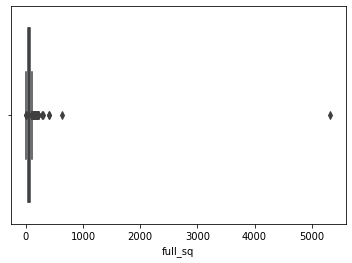

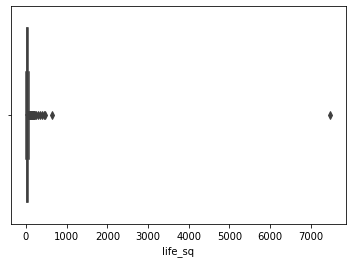

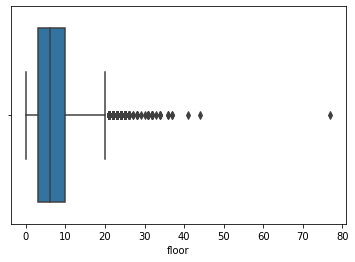

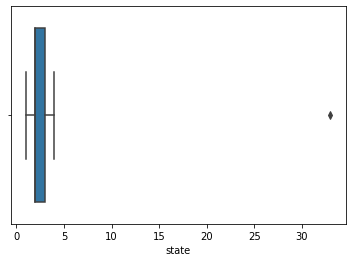

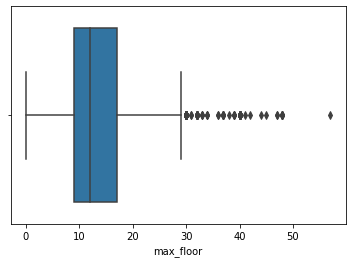

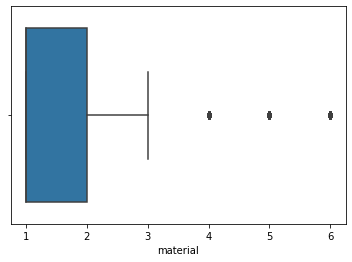

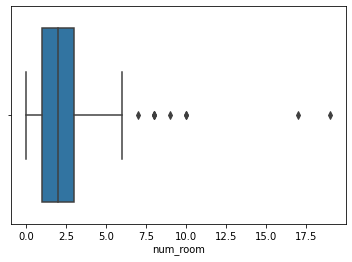

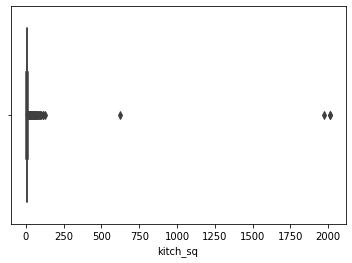

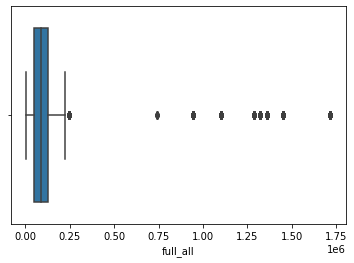

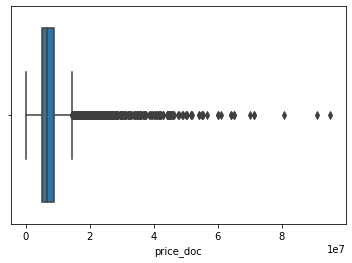

In [27]:
visualize_dataframe_outliers(df)

- Явно видно что есть выбросы в full_sq, life_sq, floor, state, kitch_sq, остальное выглядит в общей мере адекватно

- Функция которая будет обнулять выбросы, выходящие за 99.99% процентиль
- Помимо чего добавлю аргумент в функцию roll_num переменный, чтобы обнуление можно было делать несколько разa, некоторые выбросы например в колонне kitch_sq, обнуляются только после второго раза вызова функции

In [28]:
def clear_outliers(dataframe, roll_num=1):
    column_names = dataframe.columns.values
    for column_name in column_names:
        if dataframe[column_name].dtypes in ['datetime64[ns]', 'object'] or column_name in ['id']:
            continue
        for i in range(roll_num):
            # 99.99% high percentile
            percentile_high = dataframe[column_name].quantile(0.9999)
            # 0.001% low percentile
            percentile_low = dataframe[column_name].quantile(0.0001)

            # making outliers obsolete 
            dataframe[column_name] = dataframe[column_name].apply(lambda x: np.nan if x > percentile_high else x)
            dataframe[column_name] = dataframe[column_name].apply(lambda x: np.nan if x < percentile_low else x)
    return dataframe

In [29]:
df = clear_outliers(df, roll_num=2)

- Собственно выбрал 99.99% процентиль потому что выбросов у нас не так много и при этом они больше среднего показателя в 100+ раз

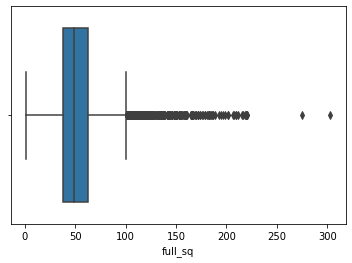

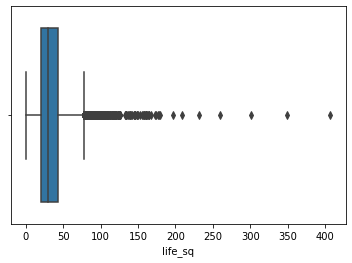

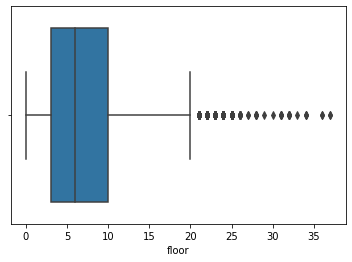

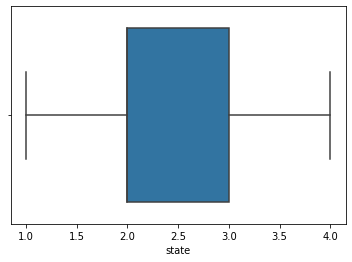

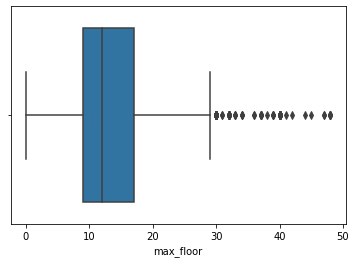

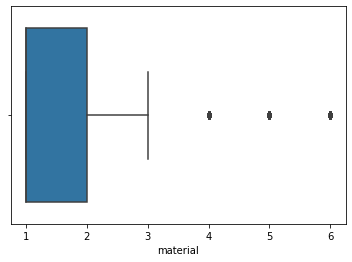

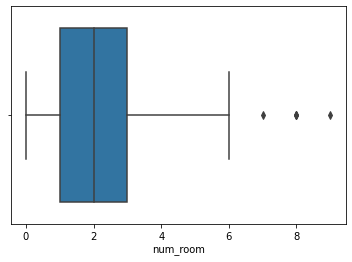

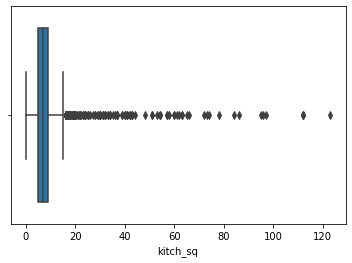

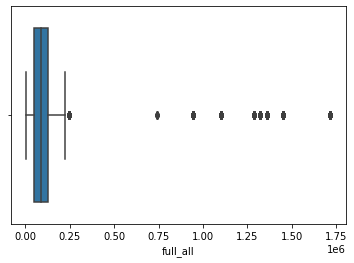

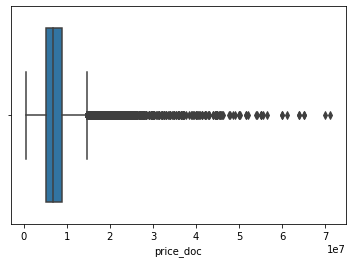

In [30]:
visualize_dataframe_outliers(df)

- После обнуления выбросов, собственно видно что данные стали более стабильными, если можно так сказать и более сгруппированы вокруг среднего значения

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18866 entries, 0 to 18865
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          18866 non-null  int64         
 1   timestamp   18866 non-null  datetime64[ns]
 2   full_sq     18860 non-null  float64       
 3   life_sq     17287 non-null  float64       
 4   floor       18835 non-null  float64       
 5   state       15504 non-null  float64       
 6   max_floor   17444 non-null  float64       
 7   material    17445 non-null  float64       
 8   build_year  15961 non-null  datetime64[ns]
 9   num_room    17441 non-null  float64       
 10  kitch_sq    17441 non-null  float64       
 11  full_all    18865 non-null  float64       
 12  sub_area    18866 non-null  object        
 13  price_doc   18859 non-null  float64       
dtypes: datetime64[ns](2), float64(10), int64(1), object(1)
memory usage: 2.0+ MB


### 1.3.2 Набор с макропоказателями

## 1.4 Обогатите основной набор данных данными из макропоказателей и поместите в переменную `df_full`

## 1.5 Проверьте данные на наличие выбросов. По каждому столбцу. Напишите своё мнение: нужно ли в каждой из ситуаций обрабатывать выбросы, или можно оставить. Если нужно обработать, то примените один из изученных подходов, либо предложите свой

### 1.5.1 Главный набор данных

### 1.5.2 Набор с макропоказателями

## 1.6 Создайте не менее 5 новых признаков на основе существующих данных. Опишите текстом обоснование создания каждой. Признаки должны привносить некую новую информацию для понимания цены квартиры

## 1.7 Провести визуальный анализ всех признаков

Ко всем графикам писать выводы текстом. Что вы видите, почему построили именно такую диаграмму

### 1.7.1 Анализ признаков по отдельности (где нужно делать группировки, преобразования категориальных типов данных к числовым, смотреть в разрезе других категориальных признаков)

### 1.7.2 Анализ совместного влияния признаков и их влияния на целевой признак